In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import os
import numpy as np

import warnings 
warnings.filterwarnings("ignore", category=FutureWarning)
sns.set(style="whitegrid", palette="pastel", font_scale=1.2)

In [29]:
train_seq_path = os.path.join('..', 'data', 'train_sequences.csv')
train_seq = pd.read_csv(train_seq_path)
train_seq = train_seq[['target_id', 'sequence']]


train_labels_path = os.path.join('..', 'data', 'train_labels.csv')
train_labels = pd.read_csv(train_labels_path)

In [34]:
print(train_seq.shape)
train_seq.head()

(844, 3)


,target_id,sequence,sequence_lenght
0,1SCL_A,GGGUGCUCAGUACGAGAGGAACCGCACCC,29
1,1RNK_A,GGCGCAGUGGGCUAGCGCCACUCAAAAGGCCCAU,34
2,1RHT_A,GGGACUGACGAUCACGCAGUCUAU,24
3,1HLX_A,GGGAUAACUUCGGUUGUCCC,20
4,1HMH_E,GGCGACCCUGAUGAGGCCGAAAGGCCGAAACCGU,34


In [31]:
train_labels.head()

,ID,resname,resid,x_1,y_1,z_1
0,1SCL_A_1,G,1,13.760,-25.974001,0.102
1,1SCL_A_2,G,2,9.310,-29.638000,2.669
2,1SCL_A_3,G,3,5.529,-27.813000,5.878
3,1SCL_A_4,U,4,2.678,-24.900999,9.793
4,1SCL_A_5,G,5,1.827,-20.136000,11.793


Los datos de entrenamiento constan de dos archivos principales:
- `train_seq`: Contiene la secuencia del RNA cuya estructura tridimensional se desea predecir.
- `train_labels`: Contiene las posiciones de cada nucleótido en la secuencia, que es lo que se quiere predecir en nuevas estructuras de RNA.

También es importante notar que tenemos 844 sequencias de entrenamiento.

In [41]:
# Calcular el len de las secuencias
train_seq['sequence'] = train_seq['sequence'].apply(str.strip)
train_seq['sequence_lenght'] = train_seq['sequence'].apply(len)
train_seq = train_seq.replace([np.inf, -np.inf], np.nan)
train_seq.isna().sum()

target_id          0
sequence           0
sequence_lenght    0
dtype: int64

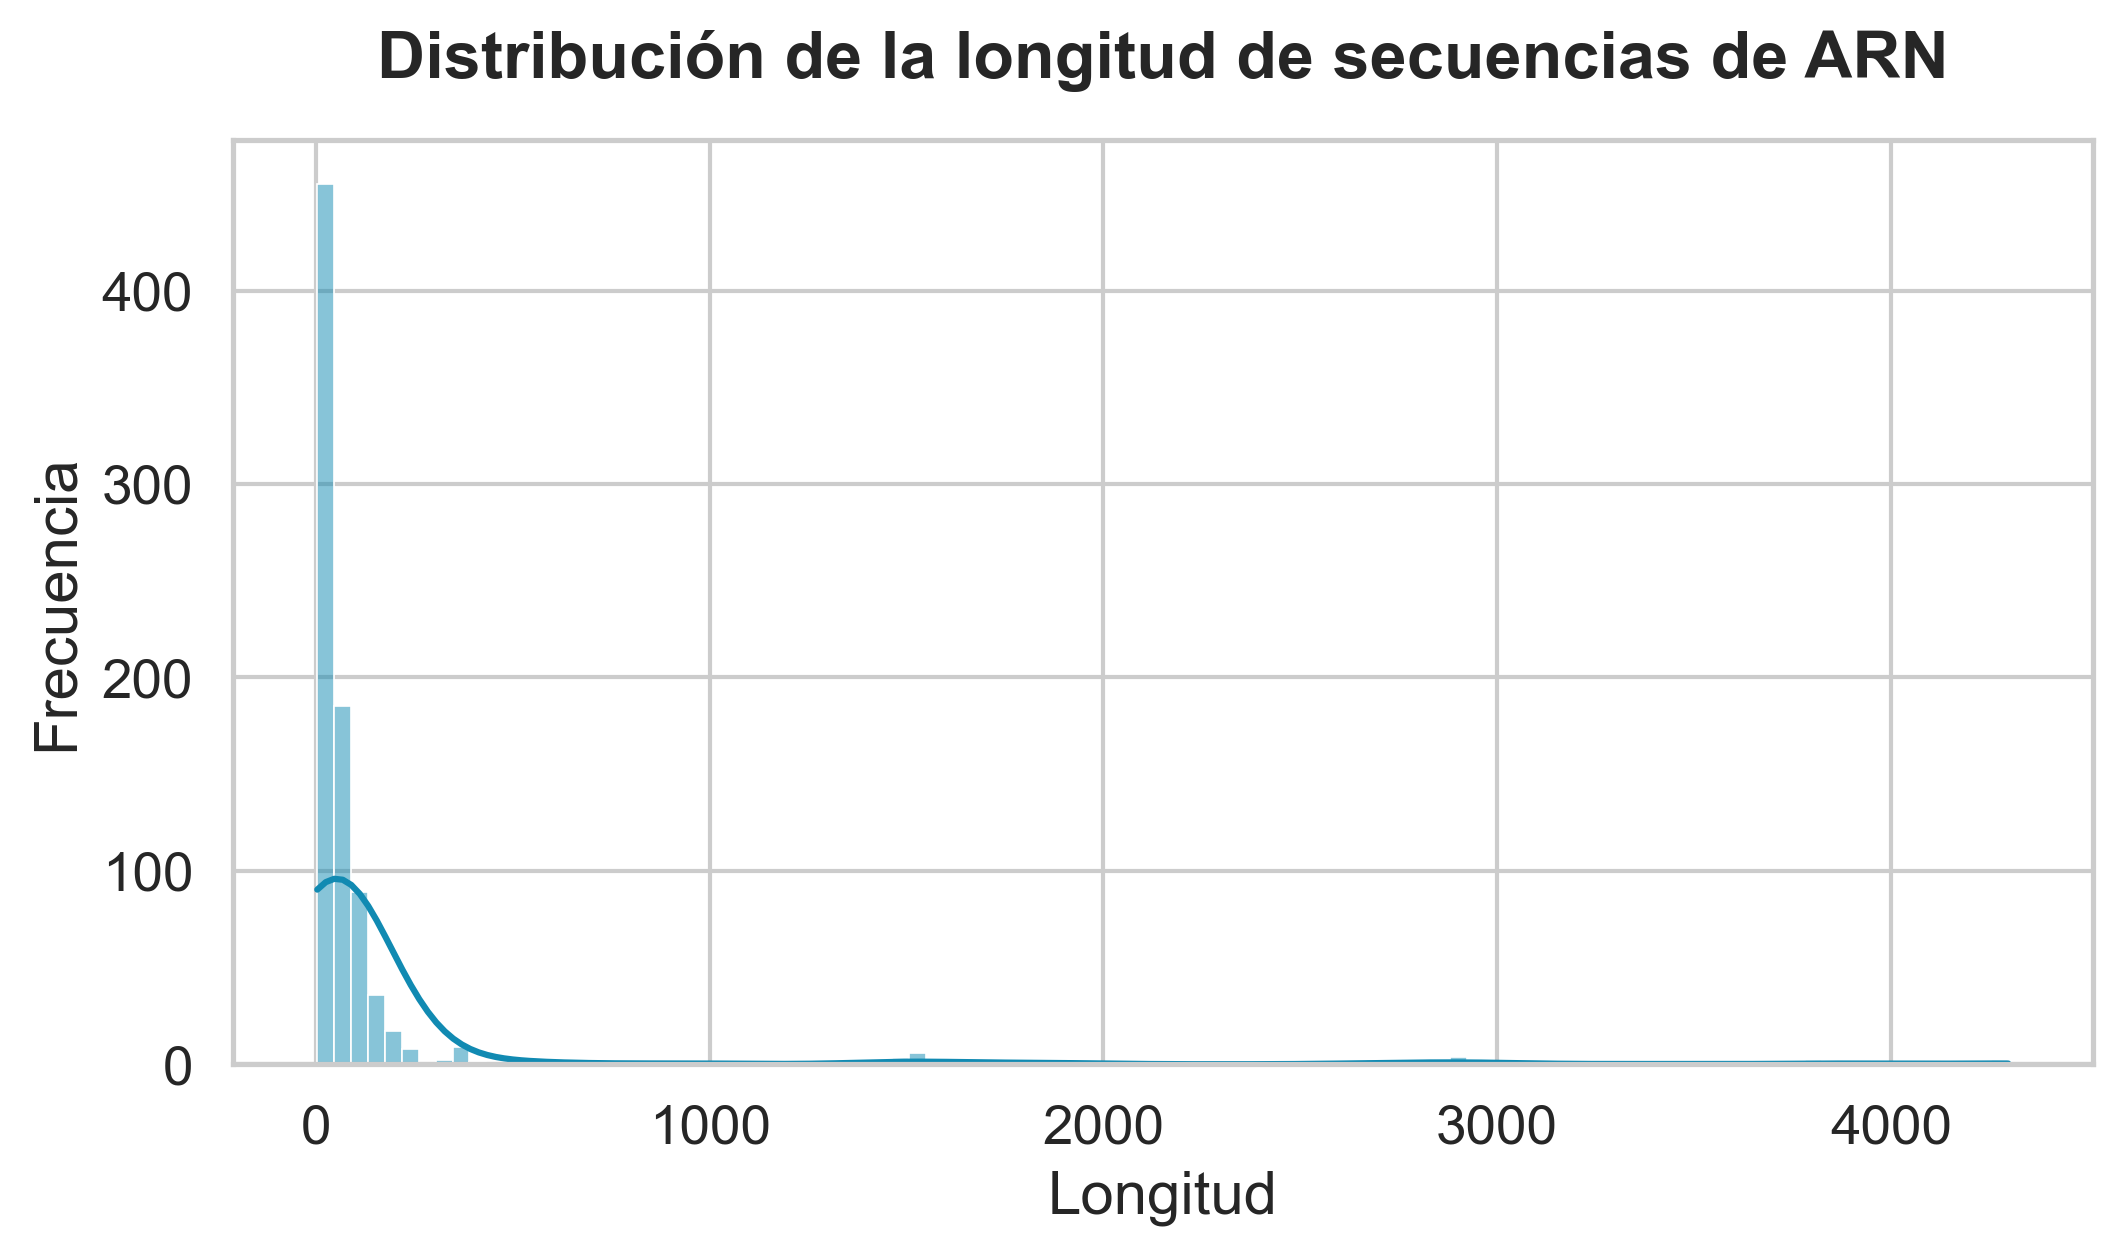

In [42]:
plt.figure(figsize=(8,4), dpi= 300)
sns.histplot(data= train_seq, 
             x= 'sequence_lenght', 
             kde= True, 
             bins= 100, 
             color='#118AB2', 
             edgecolor='white')
plt.title('Distribución de la longitud de secuencias de ARN', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Longitud')
plt.ylabel('Frecuencia')
plt.show()

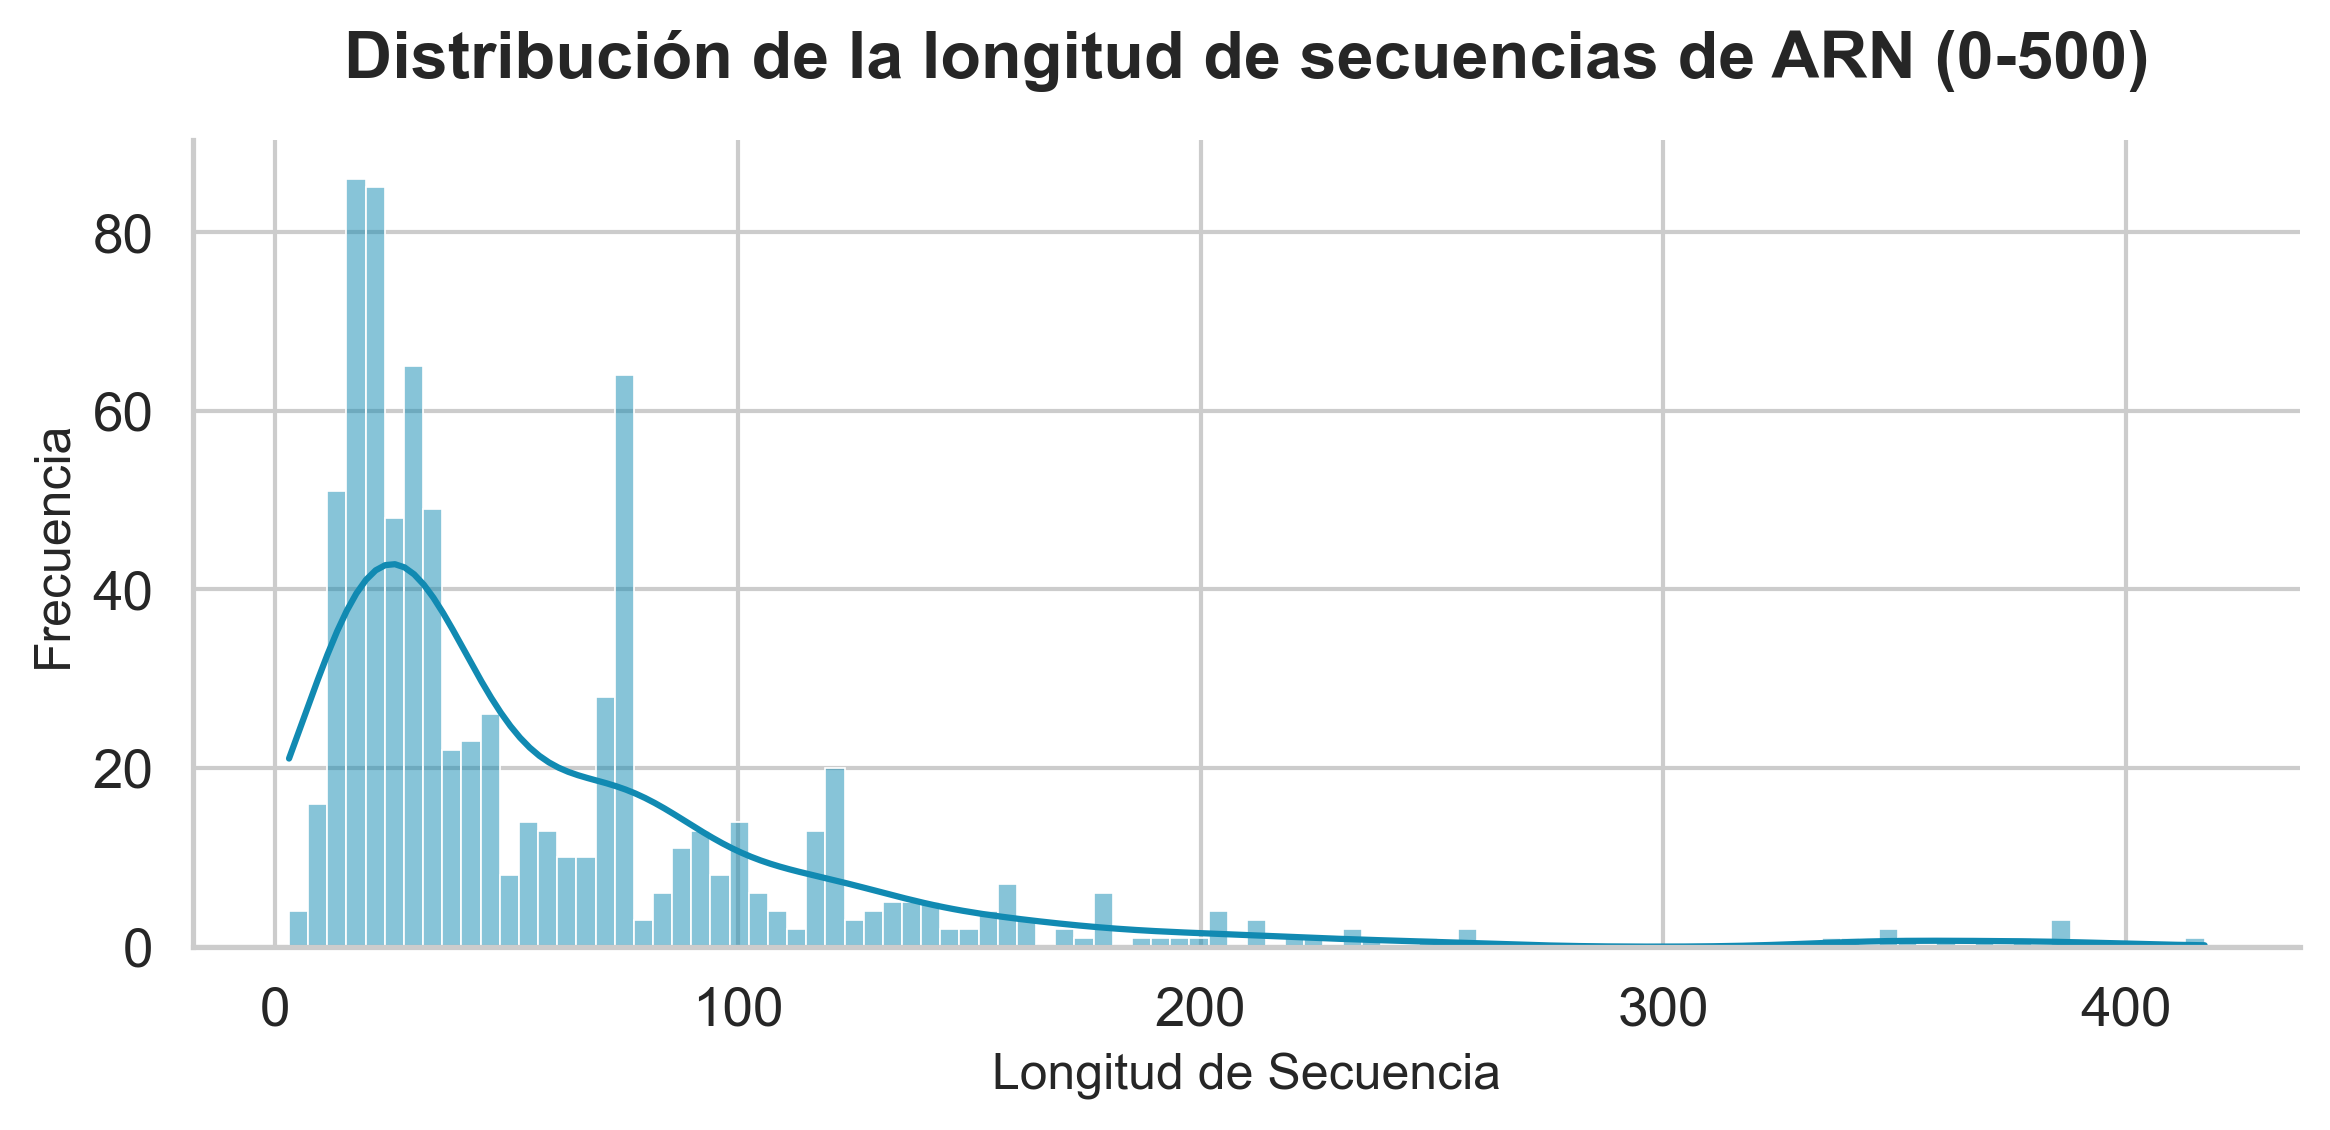

In [43]:

filtered_data = train_seq[train_seq['sequence_lenght'] <= 500]

plt.figure(figsize=(8, 4), dpi=300)
sns.histplot(
    data=filtered_data,
    x='sequence_lenght',
    kde=True,
    bins=100,
    color='#118AB2',
    edgecolor='white'
)
plt.title('Distribución de la longitud de secuencias de ARN (0-500)', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Longitud de Secuencia', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
sns.despine()
plt.tight_layout()
plt.show()

In [48]:
print(f"Secuencia más larga: {max(train_seq['sequence_lenght'])}")

Secuencia más larga: 4298
